In [1]:
# J. Ryu, Electron Microscopy and Spectroscopy Lab., Seoul National University
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hys
import tkinter.filedialog as tkf

In [ ]:
%matplotlib inline

In [17]:
num_split = 3
adr = []
num_adr = []
for i in range(num_split):
    temp = tkf.askopenfilenames()
    num_adr.append(len(temp))
    adr.append(temp)
print(num_adr)
num_img = np.max(num_adr)

[2, 2, 2]


In [36]:
mrad_per_pixel = 0.1 # mrad
print(mrad_per_pixel)
rel_lmb = 0.00197 # nm, relativistic wavelength for 300 kV
k_per_pixel = np.tan(mrad_per_pixel/1000) / rel_lmb# 1/nm
print(k_per_pixel)
r_per_pixel = 0.400 # nm

s_dim = 80
cb_rad = 20
k_list = np.arange(s_dim)*k_per_pixel
print(k_list)
print(k_list.shape)
r_list = np.arange(s_dim)
print(r_list)
print(r_list.shape)

0.1
0.050761421489001694
[0.         0.05076142 0.10152284 0.15228426 0.20304569 0.25380711
 0.30456853 0.35532995 0.40609137 0.45685279 0.50761421 0.55837564
 0.60913706 0.65989848 0.7106599  0.76142132 0.81218274 0.86294417
 0.91370559 0.96446701 1.01522843 1.06598985 1.11675127 1.16751269
 1.21827412 1.26903554 1.31979696 1.37055838 1.4213198  1.47208122
 1.52284264 1.57360407 1.62436549 1.67512691 1.72588833 1.77664975
 1.82741117 1.8781726  1.92893402 1.97969544 2.03045686 2.08121828
 2.1319797  2.18274112 2.23350255 2.28426397 2.33502539 2.38578681
 2.43654823 2.48730965 2.53807107 2.5888325  2.63959392 2.69035534
 2.74111676 2.79187818 2.8426396  2.89340102 2.94416245 2.99492387
 3.04568529 3.09644671 3.14720813 3.19796955 3.24873098 3.2994924
 3.35025382 3.40101524 3.45177666 3.50253808 3.5532995  3.60406093
 3.65482235 3.70558377 3.75634519 3.80710661 3.85786803 3.90862945
 3.95939088 4.0101523 ]
(80,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 2

In [37]:
def rif_to_rdf(rif, r_list, k_list):
    gr = []
    profile = rif / np.max(rif)
    for i in range(len(r_list)):
        sin_rk = np.sin(r_list[i]*k_list)
        rif_sin = np.multiply(profile, sin_rk)
        gr_tmp = 8 * np.pi * np.trapz(rif_sin, dx=(k_list[1]-k_list[0]))
        gr.append(gr_tmp)
    
    return np.asarray(gr)

In [38]:
data_by_split = []
gr_by_split = []
data_shape = []
for i in range(num_split):
    temp = []
    temp_gr = []
    temp_shape = []
    for path in adr[i]:
        print(path)
        tmp = hys.load(path).data
        print(tmp.shape)
        if len(np.where(tmp[0, 0] == 0.0)[0]) != cb_rad:
            tmp = np.insert(tmp, 0, 0, axis=2)        
        
        tmp = tmp[:, :, :s_dim]
        print(tmp.shape)
        
        gr_tmp = []
        for j in range(tmp.shape[0]):
            for k in range(tmp.shape[1]):
                gr_tmp.append(rif_to_rdf(tmp[j ,k], r_list, k_list))
        gr_tmp = np.asarray(gr_tmp).reshape(tmp.shape[0], tmp.shape[1], -1)   
        
        temp.append(tmp)
        temp_gr.append(gr_tmp)
        temp_shape.append(tmp.shape)
    data_by_split.append(temp)
    gr_by_split.append(temp_gr)
    data_shape.append(temp_shape)

D:/repository/data_repository/4D/20200721_amorphous_C_TZ/20200728_processed_data/5mT_D1_scan_x128_y128_radial_avg_background_subtracted.hdf5
(56, 122, 90)
(56, 122, 80)
D:/repository/data_repository/4D/20200721_amorphous_C_TZ/20200728_processed_data/5mT_E1_scan_x128_y128_radial_avg_background_subtracted.hdf5
(57, 121, 90)
(57, 121, 80)
D:/repository/data_repository/4D/20200721_amorphous_C_TZ/20200728_processed_data/50mT_B1_scan_x128_y128_radial_avg_background_subtracted.hdf5
(25, 120, 90)
(25, 120, 80)
D:/repository/data_repository/4D/20200721_amorphous_C_TZ/20200728_processed_data/50mT_C1_scan_x128_y128_radial_avg_background_subtracted.hdf5
(26, 121, 90)
(26, 121, 80)
D:/repository/data_repository/4D/20200721_amorphous_C_TZ/20200728_processed_data/B5wt_A3_scan_x128_y128_radial_avg_background_subtracted.hdf5
(44, 122, 90)
(44, 122, 80)
D:/repository/data_repository/4D/20200721_amorphous_C_TZ/20200728_processed_data/B5wt_B1_scan_x128_y128_radial_avg_background_subtracted.hdf5
(45, 118, 

In [39]:
data_shape = np.asarray(data_shape)
print(data_shape.shape)
#print(np.unique(data_shape[:, :, 2]))
#s_dim = np.min(data_shape[:, :, 2])
print(s_dim)

(3, 2, 3)
80


In [33]:
color_rep = ["green", "red", "blue", "purple", "orange", "yellow", "lime", 
             "cyan", "magenta", "lightgray", "peru", "springgreen", "deepskyblue", 
             "hotpink", "black", "darkgray"]
print(len(color_rep))

16


In [ ]:
%matplotlib inline

In [ ]:
%matplotlib qt

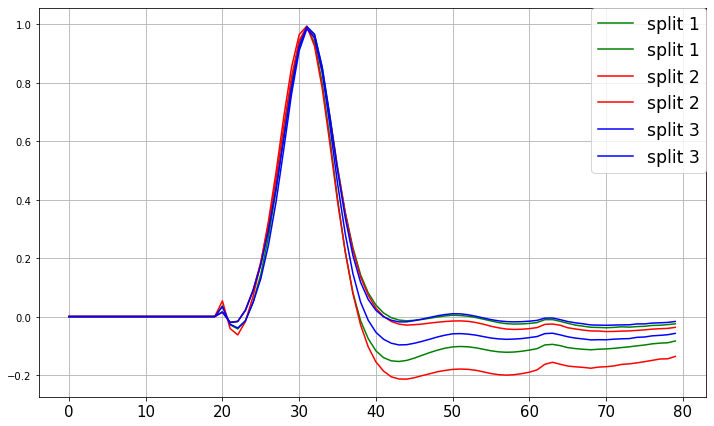

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.tick_params(axis="x", labelsize=15)
for i in range(num_split):
    for img in data_by_split[i]:
        tmp = img / np.max(img, axis=2)[:, :, np.newaxis]
        line = np.mean(tmp, axis=(0, 1))
        #line = line / np.max(line)
        ax.plot(line, color=color_rep[i], linestyle="-", label="split %d"%(i+1))
ax.grid()
fig.legend(fontsize="xx-large")
fig.tight_layout()
plt.show()

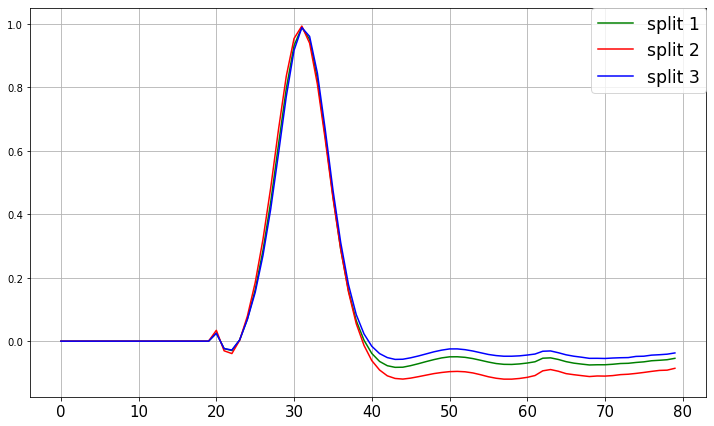

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.tick_params(axis="x", labelsize=15)
for i in range(num_split):
    temp = []
    for arr in data_by_split[i]:
        temp.extend(arr.reshape(-1, s_dim))
    temp = np.asarray(temp)
    temp = temp / np.max(temp, axis=1)[:, np.newaxis]
    line = np.mean(temp, axis=0)
    #line = line / np.max(line)
    ax.plot(line, color=color_rep[i], linestyle="-", label="split %d"%(i+1))
ax.grid()
fig.legend(fontsize="xx-large")
fig.tight_layout()
plt.show()

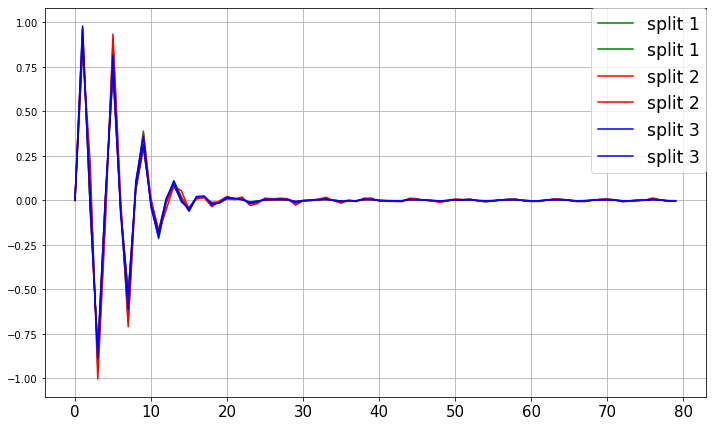

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.tick_params(axis="x", labelsize=15)
for i in range(num_split):
    for img in gr_by_split[i]:
        tmp = img / np.max(img, axis=2)[:, :, np.newaxis]
        line = np.mean(tmp, axis=(0, 1))
        #line = line / np.max(line)
        ax.plot(line, color=color_rep[i], linestyle="-", label="split %d"%(i+1))
ax.grid()
fig.legend(fontsize="xx-large")
fig.tight_layout()
plt.show()

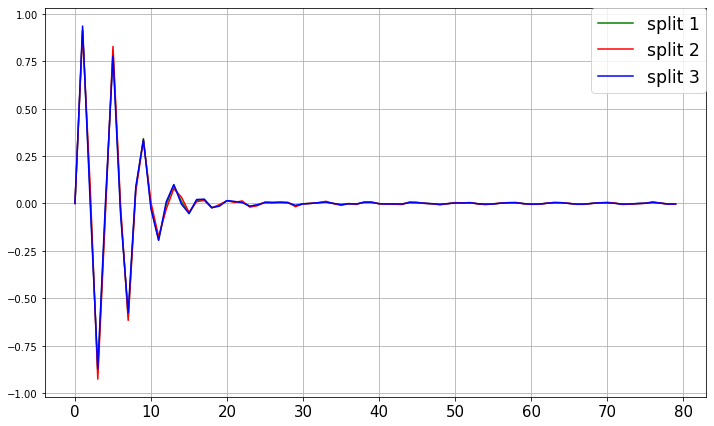

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.tick_params(axis="x", labelsize=15)
for i in range(num_split):
    temp = []
    for arr in gr_by_split[i]:
        temp.extend(arr.reshape(-1, s_dim))
    temp = np.asarray(temp)
    temp = temp / np.max(temp, axis=1)[:, np.newaxis]
    line = np.mean(temp, axis=0)
    #line = line / np.max(line)
    ax.plot(line, color=color_rep[i], linestyle="-", label="split %d"%(i+1))
ax.grid()
fig.legend(fontsize="xx-large")
fig.tight_layout()
plt.show()